#### Nama : Diajeng Sekar Prameswari
#### Kelas : EDA - C
#### NPM : 22083010003

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#jupiter notebook saya
df = pd.read_csv("C:/Users/hp/Downloads/main_data.csv")
df.head()

,Tahun,Minggu,Bulan,Minggu Bulan,Produk1,Produk2,Produk3,Produk4,Produk5,harga,suhu
0,2021.0,Minggu 1,Januari,1.0,197.0,66.0,266.0,113.0,2.0,1.0,18.0
1,2021.0,Minggu 2,Januari,2.0,153.0,44.0,264.0,74.0,1.0,2.0,21.0
2,2021.0,Minggu 3,Januari,3.0,128.0,NaN,317.0,116.0,0.0,1.0,19.0
3,2021.0,Minggu 4,Januari,4.0,133.0,57.0,390.0,70.0,0.0,2.0,17.0
4,2021.0,Minggu 5,Januari,5.0,120.0,47.0,440.0,141.0,1.0,1.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tahun         100 non-null    float64
 1   Minggu        100 non-null    object 
 2   Bulan         100 non-null    object 
 3   Minggu Bulan  101 non-null    float64
 4   Produk1       96 non-null     float64
 5   Produk2       96 non-null     float64
 6   Produk3       98 non-null     float64
 7   Produk4       99 non-null     float64
 8   Produk5       97 non-null     float64
 9   harga         100 non-null    float64
 10  suhu          99 non-null     float64
dtypes: float64(9), object(2)
memory usage: 9.3+ KB


Dilihat dari informasi di atas ternyata terdapat 11 kolom yang bertotal 107 baris data dan total ada 107 baris data, dengan data type nya float(9) dan object(2). Terdapat Non-Null Count  atau jumlah data yang tidak kosong (terisi) paling banyak yaitu 100 data dan paling sedikit 96 data yang terisi. Lalu kita lihat berapa missing value tiap kolom datanya dengan mencari missing value nya.

### 1. Data preparation
a. Identifikasi dan tangani nilai-nilai yang hilang dalam dataset

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Tahun            7
Minggu           7
Bulan            7
Minggu Bulan     6
Produk1         11
Produk2         11
Produk3          9
Produk4          8
Produk5         10
harga            7
suhu             8
dtype: int64


Dapat dilihat setelah mengidentifikasi nilai nilai yang hilang, pada semua kolom terdapat data yang tidak bernilai (N/A) dari total 107 data. Dengan data yang tidak bernilai (N/A) yang tidak terisi paling banyak yaitu 11 pada kolom Produk1 dan Produk2. Paling sedikit yaitu 7 kolom pada kolom Tahun, Minggu, dan Bulan. Selanjutnya tangani nilai nilai yang tidak hilang (N/A) tersebut. Dengan melakukan drop missing value

In [8]:
#drop missing value
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tahun         85 non-null     float64
 1   Minggu        85 non-null     object 
 2   Bulan         85 non-null     object 
 3   Minggu Bulan  85 non-null     float64
 4   Produk1       85 non-null     float64
 5   Produk2       85 non-null     float64
 6   Produk3       85 non-null     float64
 7   Produk4       85 non-null     float64
 8   Produk5       85 non-null     float64
 9   harga         85 non-null     float64
 10  suhu          85 non-null     float64
dtypes: float64(9), object(2)
memory usage: 8.0+ KB


Setelah dilakukan drop missing value agar menghapus baris yang mengandung nilai yang hilang. Maka sisa 85 data yang terisi semua.

In [9]:
sum(df.duplicated())

0

ternyata tidak terdapat duplikat data sehingga kita melanjutkan untuk melakukan perintah tahap selanjutnya.

b. Konversi format waktu kedalam sebuah tanggal dengan format Hari/Bulan/Tahun.

In [10]:
df['tanggal'] = df['Minggu'].str.split().str[-1]
df['tanggal'] = pd.to_datetime(df['Tahun'].astype(int).astype(str) + df['tanggal'] + '-0', format='%Y%U-%w')
df['Tanggal'] = df['tanggal'].dt.strftime('%d/%m/%Y')
df.drop(columns=["Tahun","Minggu",'Bulan', 'tanggal'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Minggu Bulan  85 non-null     float64
 1   Produk1       85 non-null     float64
 2   Produk2       85 non-null     float64
 3   Produk3       85 non-null     float64
 4   Produk4       85 non-null     float64
 5   Produk5       85 non-null     float64
 6   harga         85 non-null     float64
 7   suhu          85 non-null     float64
 8   Tanggal       85 non-null     object 
dtypes: float64(8), object(1)
memory usage: 6.6+ KB


In [11]:
df.tail(10)

,Minggu Bulan,Produk1,Produk2,Produk3,Produk4,Produk5,harga,suhu,Tanggal
88,2.0,158.0,205.0,1026.0,89.0,0.0,2.0,4.0,11/09/2022
89,3.0,162.0,204.0,999.0,159.0,0.0,1.0,5.0,18/09/2022
91,1.0,146.0,204.0,600.0,113.0,0.0,2.0,3.0,02/10/2022
92,2.0,160.0,265.0,843.0,82.0,0.0,1.0,5.0,09/10/2022
94,4.0,159.0,283.0,881.0,37.0,0.0,1.0,4.0,23/10/2022
95,1.0,174.0,226.0,975.0,94.0,0.0,1.0,2.0,30/10/2022
96,2.0,158.0,201.0,1141.0,91.0,0.0,2.0,3.0,06/11/2022
97,3.0,145.0,217.0,881.0,46.0,4.0,1.0,3.0,13/11/2022
98,4.0,161.0,249.0,741.0,70.0,0.0,1.0,7.0,20/11/2022
99,1.0,160.0,331.0,854.0,75.0,0.0,1.0,5.0,27/11/2022


# Menganalisa Data
a. Hitung rata-rata penjualan bulanan untuk semua produk

In [12]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

# Gabungkan penjualan Produk1, Produk2, Produk3, Produk4, dan Produk5 menjadi satu produk
df['Semua produk'] = df[['Produk1', 'Produk2', 'Produk3', 'Produk4', 'Produk5']].sum(axis=1)
df['Rata - rata semua produk'] = df['Semua produk']/5
# Kelompokkan berdasarkan bulan dan tahun, lalu hitung rata-rata untuk produk gabungan
monthly_avg_sales = df.groupby(df['Tanggal'].dt.strftime('%m/%Y'))['Rata - rata semua produk'].mean()

print(monthly_avg_sales)

Tanggal
01/2021    122.000000
01/2022    229.050000
02/2021    126.800000
02/2022    209.933333
03/2021    151.250000
03/2022    225.900000
04/2021    141.950000
04/2022    220.650000
05/2021    168.160000
05/2022    225.320000
06/2021    167.133333
06/2022    261.000000
07/2021    171.866667
07/2022    252.066667
08/2021    184.640000
08/2022    253.500000
09/2021    166.200000
09/2022    292.200000
10/2021    184.640000
10/2022    262.100000
11/2021    187.500000
11/2022    276.250000
12/2021    200.150000
Name: Rata - rata semua produk, dtype: float64


b. Hitung median dari penjualan bulanan

In [13]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

# Menghitung median dari penjualan bulanan
monthly_median_sales = df.groupby(df['Tanggal'].dt.strftime('%m/%Y'))['Rata - rata semua produk'].median()

print(monthly_median_sales)

Tanggal
01/2021    128.8
01/2022    229.7
02/2021    112.2
02/2022    196.4
03/2021    147.7
03/2022    225.6
04/2021    144.2
04/2022    224.6
05/2021    174.4
05/2022    225.4
06/2021    163.2
06/2022    261.0
07/2021    180.4
07/2022    256.4
08/2021    191.6
08/2022    252.4
09/2021    163.2
09/2022    295.6
10/2021    197.0
10/2022    271.0
11/2021    187.5
11/2022    271.3
12/2021    193.8
Name: Rata - rata semua produk, dtype: float64


c. Diagram batang (bar chart) yang menunjukkan total penjualan selama 2 tahun pada masing-masing produk dalam satu grafik

<function matplotlib.pyplot.show(close=None, block=None)>

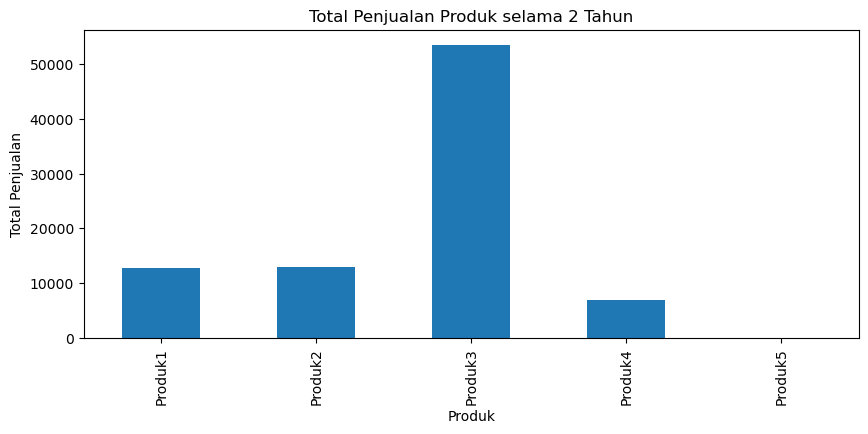

In [14]:
# Buat kolom baru 'Tahun'
df['Tahun'] = df['Tanggal'].dt.year
total_2021 = df[df['Tahun'] == 2021][['Produk1', 'Produk2', 'Produk3', 'Produk4', 'Produk5']].sum()
total_2022 = df[df['Tahun'] == 2022][['Produk1', 'Produk2', 'Produk3', 'Produk4', 'Produk5']].sum()

# Menggabungkan total penjualan dari tahun 2021 dan 2022
total_sales = total_2021 + total_2022

# Membuat diagram batang
plt.figure(figsize=(10, 4))
total_sales.plot(kind='bar')
plt.title('Total Penjualan Produk selama 2 Tahun')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan')
plt.show


d. Hitung standar deviasi penjualan bulanan pada masing-masing produk

In [15]:
# Buat kolom baru 'Tahun'
df['Tahun'] = df['Tanggal'].dt.year

# Buat kolom baru 'Bulan'
df['Bulan'] = df['Tanggal'].dt.month
df_product = df.groupby(['Produk1', 'Produk2', 'Produk3', 'Produk4', 'Produk5'])
product_std_sales = df_product['harga'].std()

print(product_std_sales)

Produk1  Produk2  Produk3  Produk4  Produk5
113.0    173.0    644.0    74.0     0.0       NaN
         192.0    883.0    64.0     0.0       NaN
118.0    199.0    930.0    51.0     0.0       NaN
120.0    132.0    770.0    70.0     0.0       NaN
122.0    157.0    526.0    159.0    0.0       NaN
                                               ..
178.0    192.0    747.0    66.0     0.0       NaN
179.0    267.0    865.0    70.0     0.0       NaN
184.0    158.0    397.0    143.0    0.0       NaN
185.0    78.0     479.0    74.0     0.0       NaN
197.0    66.0     266.0    113.0    2.0       NaN
Name: harga, Length: 85, dtype: float64


### 3. Time Series
a. Gambarkan plot deret waktu untuk penjualan selama dua tahun pada semua produk

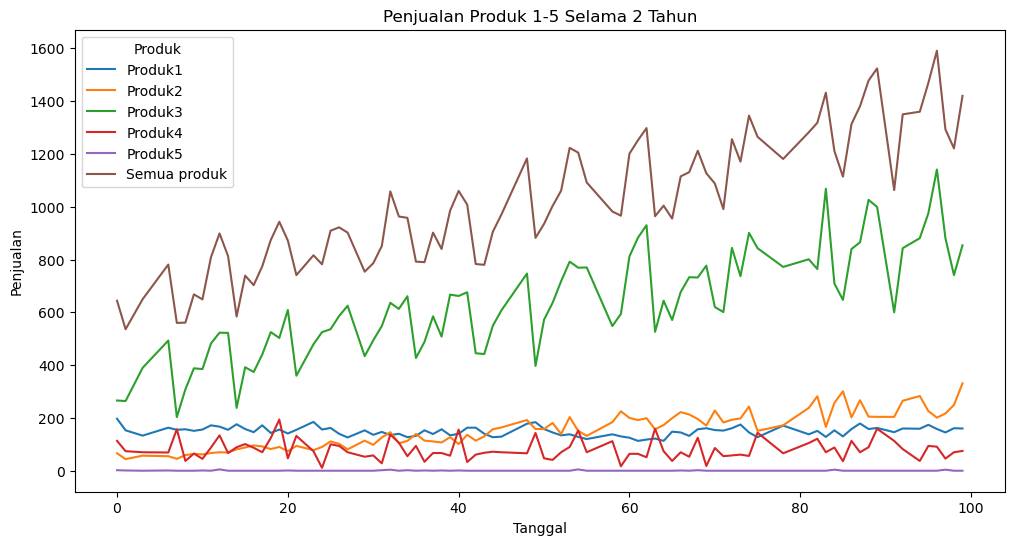

In [16]:
produk = df[['Produk1', 'Produk2', 'Produk3', 'Produk4', 'Produk5','Semua produk']]

# Buat plot deret waktu hanya untuk produk 1 hingga 5
plt.figure(figsize=(12, 6))
sns.lineplot(data=produk, dashes=False)
plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.title('Penjualan Produk 1-5 Selama 2 Tahun')
plt.legend(produk.columns, title='Produk')
plt.show()

b. Hitung rata-rata penjualan pada minggu 1 dan minggu 4 dalam bulan, apakah ada
yang bisa diceritakan?

In [17]:
df_minggu = df.groupby('Minggu Bulan', sort=False)[['Produk1', 'Produk2', 'Produk3', 'Produk4', 'Produk5']].mean().reset_index()
print(df_minggu)

   Minggu Bulan     Produk1     Produk2     Produk3     Produk4   Produk5
0           1.0  153.750000  159.950000  614.300000   77.350000  0.100000
1           2.0  149.500000  154.727273  672.863636   77.909091  0.363636
2           4.0  146.888889  147.555556  607.666667   66.722222  0.500000
3           3.0  147.650000  146.100000  612.000000  100.350000  0.850000
4           5.0  144.200000  169.600000  674.400000   73.400000  0.400000


dari hasil diatas dapat dilihat Tabel tersebut menunjukkan rata-rata penjualan produk dalam berbagai minggu bulan dan terdapat adanya variasi dalam penjualan produk dari minggu ke minggu. jika pada Minggu 1, 2, dan 4 memiliki rata-rata penjualan yang lebih rendah daripada minggu 3 dan 5. Pada Produk3 memiliki penjualan yang relatif stabil sepanjang bulan, dengan rata-rata yang tinggi. Pada Produk5 memiliki penjualan yang sangat rendah, dengan perubahan kecil dalam penjualan.

c. Apakah terdapat trend atau musiman dalam data tersebut? Jelaskan hasil analisis
anda

hasil analisis menunjukkan :
1. Produk 1 mengalami penjualan yang stabil naik turunnya dan penjualannya dibawah angka 200 penjualan.
2. Produk 2 penjualannya semakin meningkat tiap bulannya meskipun penjualannya tidak pernah menyentuh angka 300
3. Produk 3 penjualannya paling banyak yaitu diatas 200 penjualan dan pernah paling banyak kurang lebih 1000 penjualan, namun selalu ada penurunan kurang lebih 200 penjualan.
4. Produk 4 penjualannya yang naik turun dan di bawah 150, dan ada satu waktu mendekati angka 200.
5. Produk 5 Penjuaan produk 5 sangatlah rendah karena menyentuh angka 1 pun jarang.

Dengan begitu dapat ditarik kesimpulan pada produk 1 tidak terdapat trend yang signifikan dalam penjualannya, dan pada Produk 2 terdapat tren namun peningkatannya yang sedikit tidak seperti produk 3 yang jelas terdapat adanya tren atau musiman adanya musimannya sehingga tiap bulan penjualannya naik turun seiring adanya tren yang terjadi, begitupun produk 4 dan 5 tidak ada tren yang jelaskarena pada produk 4 terdapat banyak penurunannya dibanding peningkatannya begitupun produk 5 yang jarang dibeli oleh masyarakat.

### Bivariate Analysis
a. Gambarkan scatter plot antara produk4 dan suhu dan harga

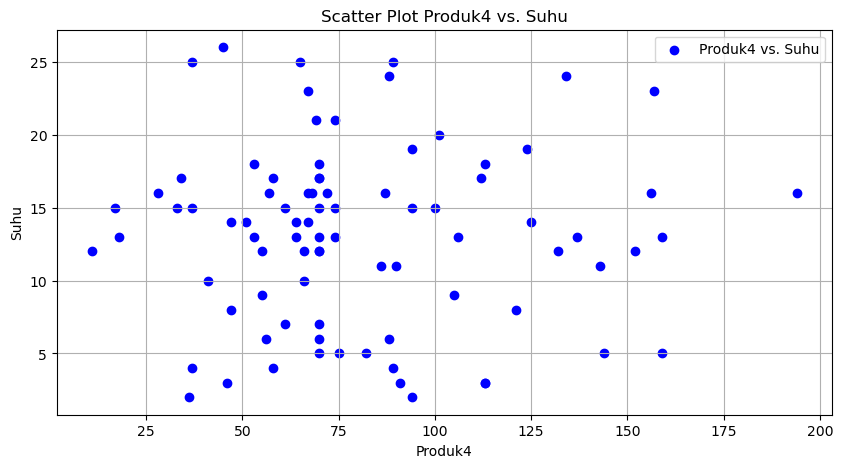

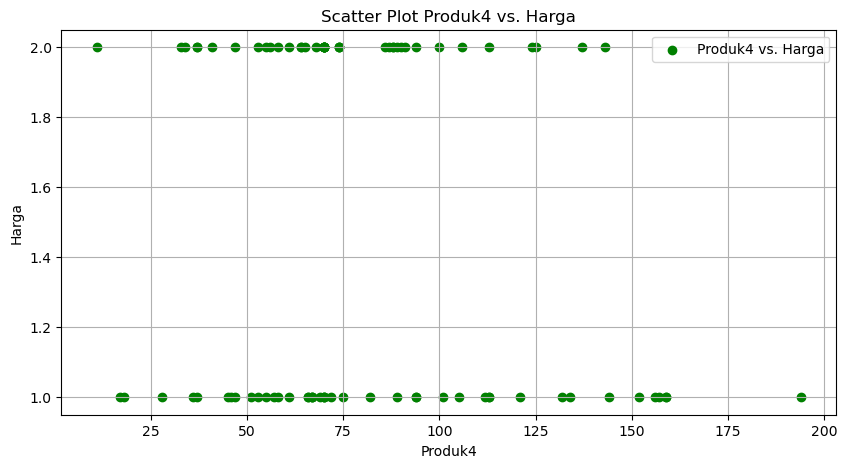

In [18]:
# Scatter plot antara 'Produk4' dan 'suhu'
plt.figure(figsize=(10, 5))
plt.scatter(df['Produk4'], df['suhu'], c='blue', label='Produk4 vs. Suhu')
plt.title('Scatter Plot Produk4 vs. Suhu')
plt.xlabel('Produk4')
plt.ylabel('Suhu')
plt.legend()
plt.grid(True)

# Tampilkan scatter plot
plt.show()

# Scatter plot antara 'Produk4' dan 'harga'
plt.figure(figsize=(10, 5))
plt.scatter(df['Produk4'], df['harga'], c='green', label='Produk4 vs. Harga')
plt.title('Scatter Plot Produk4 vs. Harga')
plt.xlabel('Produk4')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)

# Tampilkan scatter plot
plt.show()

b. Lakukan analisis korelasi antara produk4 dan suhu dan harga

In [19]:
# Korelasi antara 'Produk4' dan 'suhu' menggunakan Pearson
pearson_corr_suhu = df['Produk4'].corr(df['suhu'], method='pearson')
print(f"Korelasi Pearson antara Produk4 dan suhu: {pearson_corr_suhu:.2f}")

# Korelasi antara 'Produk4' dan 'harga' menggunakan Pearson
pearson_corr_harga = df['Produk4'].corr(df['harga'], method='pearson')
print(f"Korelasi Pearson antara Produk4 dan harga: {pearson_corr_harga:.2f}")

Korelasi Pearson antara Produk4 dan suhu: -0.00
Korelasi Pearson antara Produk4 dan harga: -0.15


In [20]:
# Korelasi antara 'Produk4' dan 'suhu' menggunakan Spearman
spearman_corr_suhu = df['Produk4'].corr(df['suhu'], method='spearman')
print(f"Korelasi Spearman antara Produk4 dan suhu: {spearman_corr_suhu:.2f}")

# Korelasi antara 'Produk4' dan 'harga' menggunakan Spearman
spearman_corr_harga = df['Produk4'].corr(df['harga'], method='spearman')
print(f"Korelasi Spearman antara Produk4 dan harga: {spearman_corr_harga:.2f}")

Korelasi Spearman antara Produk4 dan suhu: -0.02
Korelasi Spearman antara Produk4 dan harga: -0.08


c. Apakah terdapat hubungan antara produk4 dengan suhu dan harga? Jelaskan

dilihat dari hasil analisis korelasi antar produk 4 dan suhu dan harga menghasilkan :
Korelasi antara Produk4 dan suhu adalah -0.00.
Korelasi antara Produk4 dan harga adalah -0.15.
sehingga dapat disimpulkan jika pada tidak ada korelasi antar produk 4 dan suhu karena nilainya -0.00 sehingga perubahan suhunya tidak mempengaruhi perubahan dalam produk ke 4, Pada Produk 4 dan harga terdapat adanya korelasi karena hasil korelasi pearsonnya -0.15 tanda negatif menunjukkan adanya korelasi (hubungan) negatif lemah antar produk 4 dan harga, Ketika harganya meningkat maka produk 4 mengalami penurunan penjualan namun penurunannya lemah atau mengalami sedikit penurunan.

Simpan kode dan output, kode harus siap untuk dijalankan. Jika kode tidak bisa dijalankan maka
nilai berkurang. Tulis kesimpulan dari analisis eksplorasi yang telah dilakukan. Dikumpulkan dengan
file pdf untuk jawabannya. Dan kode dalam bentuk .ipynb. Maksimal jumat 3 November 2023
melalui google form berikut: https://forms.gle/aiMjEuo3rbq3Fr2u6.